<a href="https://colab.research.google.com/github/rudrachand/mlc-llm/blob/main/Auto_parts_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Read the data
df=pd.read_excel('Data for Autopricing.xlsx')

In [3]:
df.head()

,Trans_Num,Customer_Number,Customer_Branch,Sell_Date,Customer_LSTYR_Sales,product_id,Part_Category,Quantity_Shipped,Selling_Price,Selling_Cost,Base_Price,DCOST,Price_Cluster,Selling_Location,Location_Region,Customer_Salesman,Territory_Salesperson,Territory_Names,Area_Manager,Area_Name
0,77686701,1,0,2016-06-07,17.39,245_20970182,Clutch,1,929.17,628.980,929.17,628.98,PRC2,COI,WEST,154.0,TS222,SOCAL WEST,TF,SOUTHWEST CALIF
1,66829575,3501,0,2015-02-20,25813.55,245_20970182,Clutch,1,943.96,607.070,943.96,628.98,PRC1,AL,CENTRAL,16.0,OPEN,SOUTH TEXAS,DB1,SOUTH TEXAS
2,58890845,10070,0,2014-01-27,83574.66,245_20970182,Clutch,1,820.20,607.070,820.20,628.98,PRC1,CC,CENTRAL,109.0,TS251,SOUTH TEXAS,DB1,SOUTH TEXAS
3,73598323,10144,13,2015-11-18,78834.74,245_20970182,Clutch,1,868.80,622.748,868.80,628.98,PRC1,CC,CENTRAL,111.0,TS117,SOUTH TEXAS,DB1,SOUTH TEXAS
4,65139121,11404,22,2014-11-20,79565.88,245_20970182,Clutch,1,757.66,607.070,757.66,628.98,PRC1,CC,CENTRAL,3.0,TS251,SOUTH TEXAS,DB1,SOUTH TEXAS


In [4]:
df.columns

Index(['Trans_Num', 'Customer_Number', 'Customer_Branch', 'Sell_Date',
       'Customer_LSTYR_Sales', 'product_id', 'Part_Category',
       'Quantity_Shipped', 'Selling_Price', 'Selling_Cost', 'Base_Price',
       'DCOST', 'Price_Cluster', 'Selling_Location', 'Location_Region',
       'Customer_Salesman', 'Territory_Salesperson', 'Territory_Names',
       'Area_Manager', 'Area_Name'],
      dtype='object')

In [5]:
#Let's select  valid columns which are relevant to consider
selected_columns = ['Sell_Date', 'Customer_LSTYR_Sales', 'Quantity_Shipped', 'Selling_Price', 'Selling_Cost',
                    'Base_Price', 'Price_Cluster', 'Selling_Location', 'Location_Region', 'Customer_Salesman',
                    'Territory_Salesperson', 'Territory_Names', 'Area_Name']
data = df[selected_columns]

In [6]:
# Make Date as Index
# data['Sell_Date'] = pd.to_datetime(data['Sell_Date'])  # Convert 'Sell_Date' to datetime format
# data.set_index('Sell_Date', inplace=True)  # Set 'Sell_Date' as the index in-place

In [7]:
data.head()

,Sell_Date,Customer_LSTYR_Sales,Quantity_Shipped,Selling_Price,Selling_Cost,Base_Price,Price_Cluster,Selling_Location,Location_Region,Customer_Salesman,Territory_Salesperson,Territory_Names,Area_Name
0,2016-06-07,17.39,1,929.17,628.980,929.17,PRC2,COI,WEST,154.0,TS222,SOCAL WEST,SOUTHWEST CALIF
1,2015-02-20,25813.55,1,943.96,607.070,943.96,PRC1,AL,CENTRAL,16.0,OPEN,SOUTH TEXAS,SOUTH TEXAS
2,2014-01-27,83574.66,1,820.20,607.070,820.20,PRC1,CC,CENTRAL,109.0,TS251,SOUTH TEXAS,SOUTH TEXAS
3,2015-11-18,78834.74,1,868.80,622.748,868.80,PRC1,CC,CENTRAL,111.0,TS117,SOUTH TEXAS,SOUTH TEXAS
4,2014-11-20,79565.88,1,757.66,607.070,757.66,PRC1,CC,CENTRAL,3.0,TS251,SOUTH TEXAS,SOUTH TEXAS


In [8]:
# Summary statistics for numerical columns
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
        Customer_LSTYR_Sales  Quantity_Shipped  Selling_Price  Selling_Cost  \
count          2.377000e+03       5329.000000    5329.000000   5329.000000   
mean           9.618260e+04          1.282605     726.883958    613.075595   
std            1.211651e+05          1.589450      68.126853     10.620147   
min           -3.057570e+03          1.000000     589.420000    601.067000   
25%            1.612563e+04          1.000000     674.520000    601.067000   
50%            4.901527e+04          1.000000     705.840000    607.070000   
75%            1.346747e+05          1.000000     775.000000    622.748000   
max            1.234711e+06        100.000000    1169.200000    628.980000   

        Base_Price  Customer_Salesman  
count  5329.000000        2377.000000  
mean    803.243106        3898.432057  
std      56.475789        2798.958453  
min     665.710000           3.000000  
25%     773.750000        1223.000000  
50%     801.420000        3360.0000

#Let's analyse a bit the missing value column distribution for column "Customer_LSTYR_Sales","Customer_Salesman","Territory_Salesperson" and "Territory_Names"

In [9]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Sell_Date                   0
Customer_LSTYR_Sales     2952
Quantity_Shipped            0
Selling_Price               0
Selling_Cost                0
Base_Price                  0
Price_Cluster               0
Selling_Location            0
Location_Region             0
Customer_Salesman        2952
Territory_Salesperson       2
Territory_Names            24
Area_Name                   0
dtype: int64


In [10]:
unique_locations = df['Location_Region'].unique()
unique_locations

array(['WEST', 'CENTRAL', 'SOUTHEAST', 'NORTHEAST'], dtype=object)

Skewness: 2.028879562862088


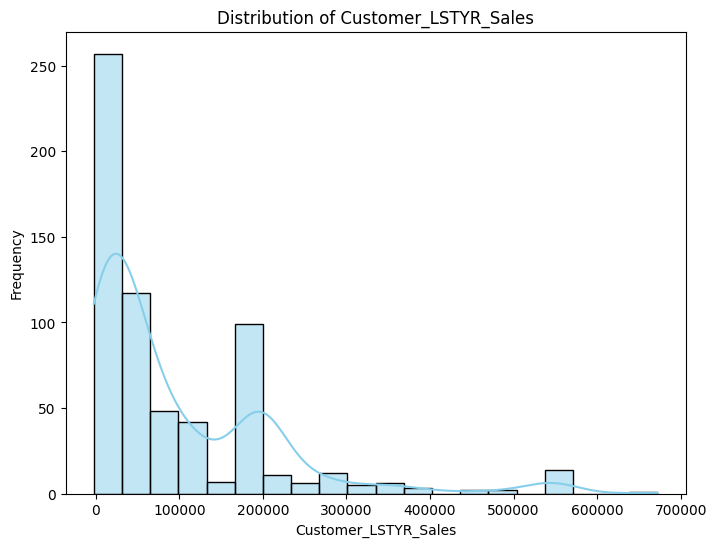

In [11]:
# Check the skewness of the Customer_LSTYR_Sales column
skewness = data[data['Location_Region'] == 'WEST']['Customer_LSTYR_Sales'].skew()
print(f"Skewness: {skewness}")

# Visualize the distribution with a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data[data['Location_Region'] == 'WEST']['Customer_LSTYR_Sales'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer_LSTYR_Sales')
plt.xlabel('Customer_LSTYR_Sales')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Iterate over each location and impute the mean for 'Customer_LSTYR_Sales'
for location in unique_locations:
    median_sales = data[data['Location_Region'] == location]['Customer_LSTYR_Sales'].median()
    data.loc[data['Location_Region'] == location, 'Customer_LSTYR_Sales'] = \
    data.loc[data['Location_Region'] == location, 'Customer_LSTYR_Sales'].fillna(median_sales)

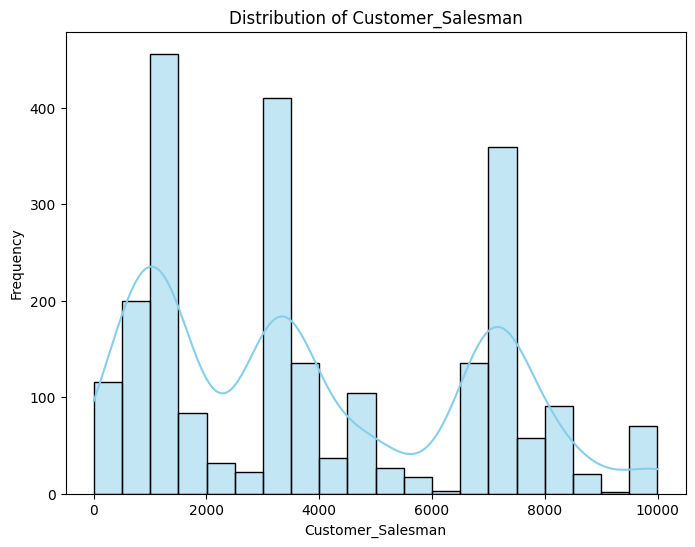

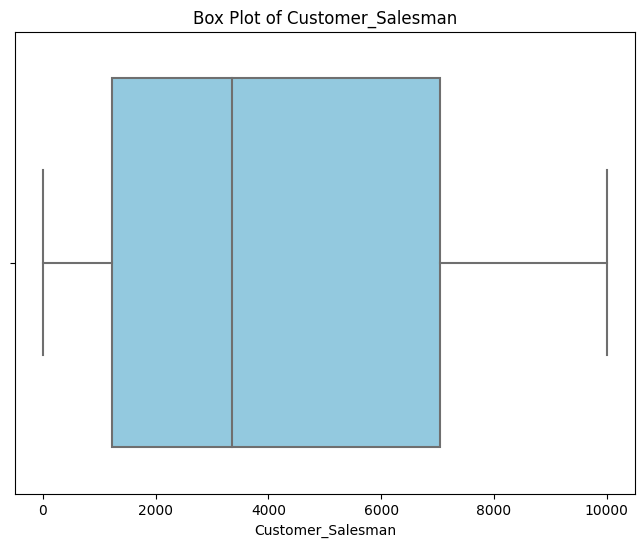

In [13]:
# Visualize the distribution with a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['Customer_Salesman'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer_Salesman')
plt.xlabel('Customer_Salesman')
plt.ylabel('Frequency')
plt.show()

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Customer_Salesman'], color='skyblue')
plt.title('Box Plot of Customer_Salesman')
plt.xlabel('Customer_Salesman')
plt.show()

In [14]:
# Impute missing values in Customer_Salesman with the median
median_customer_salesman = data['Customer_Salesman'].median()
data['Customer_Salesman'].fillna(median_customer_salesman, inplace=True)

<ipython-input-14-f53a0a3de01a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Customer_Salesman'].fillna(median_customer_salesman, inplace=True)


In [15]:
data[data['Territory_Names'].isnull()]['Location_Region'].value_counts()

CENTRAL    15
WEST        9
Name: Location_Region, dtype: int64

In [16]:
#As we can see most of the missing values are from  'CENTRAL' location region , let's impute the data with most frequent value
data[data['Location_Region'] == 'CENTRAL']['Territory_Names'].mode()[0]

'EAST TEXAS'

In [17]:
data[data['Location_Region'] == 'WEST']['Territory_Names'].mode()[0]

'SOCAL WEST'

So we should fill the most frequent values with EAST TEXAS , where 'Location_Region' = 'CENTRAL' and SOCAL WEST where 'Location_Region' = 'WEST'

In [18]:
# Define custom imputation logic based on 'Location_Region'
impute_values = {
    'CENTRAL': 'EAST TEXAS',
    'WEST': 'SOCAL WEST'
}

In [19]:
# Impute missing values in Territory_Names based on Location_Region
data['Territory_Names'] = data.apply(
    lambda row: impute_values[row['Location_Region']]
                  if pd.isnull(row['Territory_Names'])
                  else row['Territory_Names'],
    axis=1
)

<ipython-input-19-e8af89706c20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Territory_Names'] = data.apply(


Ok So now the data is cleaned and ready for further analysis

# Distribution of sales over time (e.g., by year, month)

The analysis of the distribution of sales over time shows the following insights:

The distribution of sales by year provides an understanding of the sales trend over different years.
The distribution of sales by month allows us to observe any seasonality or monthly variations in sales.

<ipython-input-20-a84d057661d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data.Sell_Date.dt.year
<ipython-input-20-a84d057661d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data.Sell_Date.dt.month


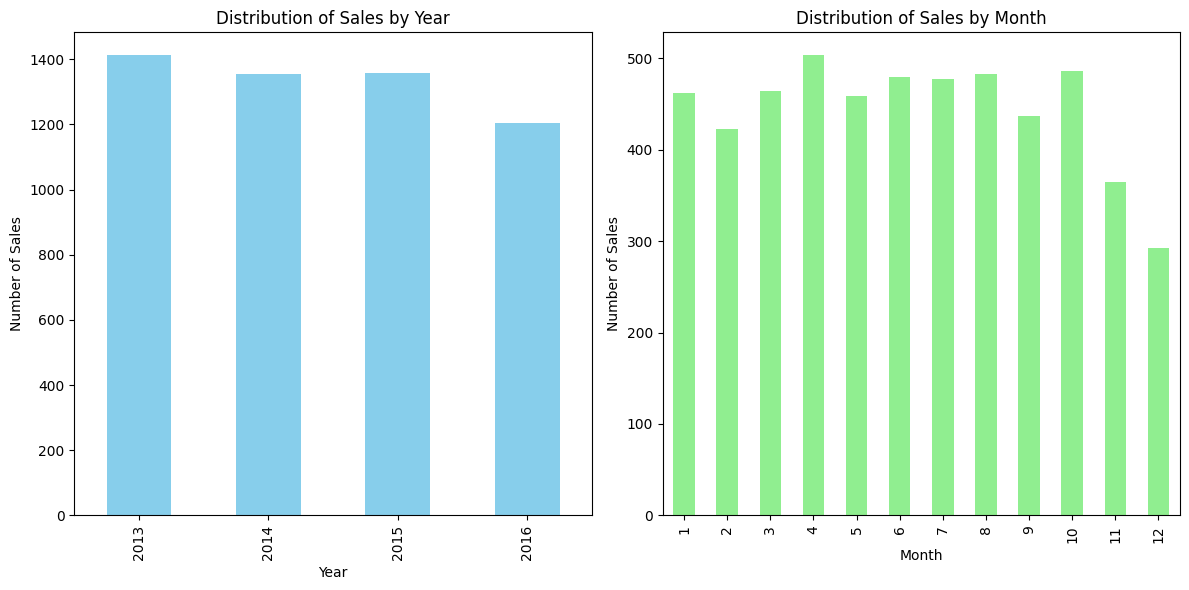

In [20]:
#Extracting year and month from sale_date
data['Year'] = data.Sell_Date.dt.year
data['Month'] = data.Sell_Date.dt.month

#Distribution of sales over year and month
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
data['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')

plt.subplot(1, 2, 2)
data['Month'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')

plt.tight_layout()
plt.show();

Next, we will proceed with the pricing analysis to understand the relationship between selling price, base price, and price clusters

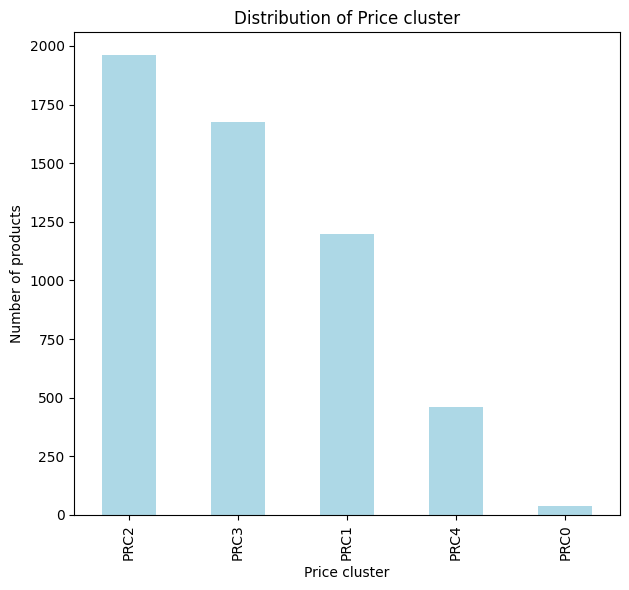

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
data['Price_Cluster'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Price cluster')
plt.xlabel('Price cluster')
plt.ylabel('Number of products')

plt.tight_layout()
plt.show()

we will explore the geographic distribution of sales to understand the sales performance across different locations and regions.

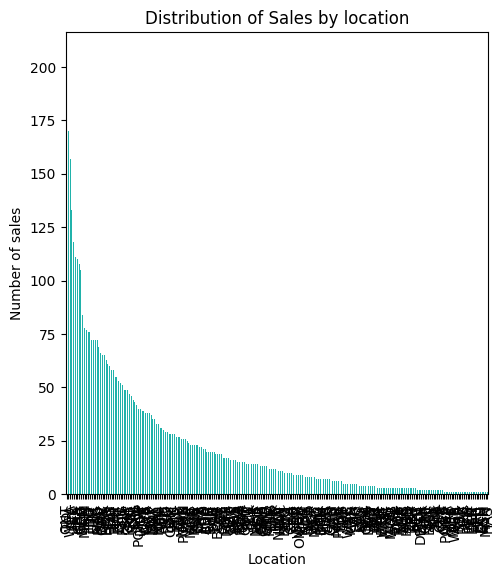

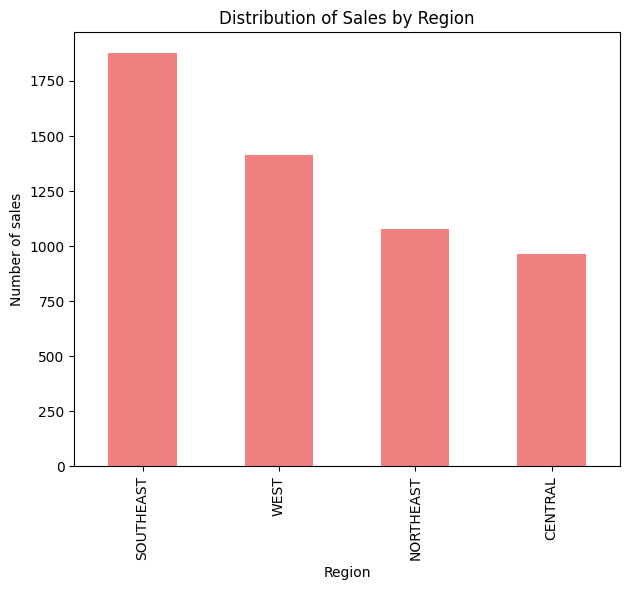

In [22]:
#Geographic distribution of Sales
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
data['Selling_Location'].value_counts().plot(kind='bar', color='lightseagreen')
plt.title('Distribution of Sales by location')
plt.xlabel('Location')
plt.ylabel('Number of sales')

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
data['Location_Region'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Number of sales')

plt.tight_layout()
plt.show()

Next, we will proceed with developing the discounting strategy based on the insights extracted. This will involve considering smart pricing guidelines that result in a win-win for both the customers and AA, while addressing the impact on margins due to price negotiation.

In [23]:
data.sample(5)

,Sell_Date,Customer_LSTYR_Sales,Quantity_Shipped,Selling_Price,Selling_Cost,Base_Price,Price_Cluster,Selling_Location,Location_Region,Customer_Salesman,Territory_Salesperson,Territory_Names,Area_Name,Year,Month
666,2013-10-01,31927.49,1,667.84,601.067,803.59,PRC3,TOL,NORTHEAST,3360.0,CALL151,MICHIGAN/OHIO,MICHIGAN/OHIO,2013,10
3017,2013-12-10,44462.98,2,667.91,601.067,721.78,PRC2,DEN,WEST,3360.0,OPEN,MOUNTAIN WEST,MOUNTAIN EAST,2013,12
2192,2015-10-07,31927.49,1,684.25,622.748,836.85,PRC1,CHN,NORTHEAST,3360.0,TS99,BALTIMORE,MARYLAND DELAWARE,2015,10
909,2016-02-10,48097.18,1,667.84,620.360,667.84,PRC2,HRN,CENTRAL,3360.0,TS71,OK/AR/S MO,MISSOURI ARKANSAS OKLAHOMA,2016,2
790,2014-04-24,48097.18,1,667.84,607.070,742.80,PRC3,HTE,CENTRAL,3360.0,TS247,EAST TEXAS,EAST TEXAS,2014,4


In [24]:
data.describe()

,Customer_LSTYR_Sales,Quantity_Shipped,Selling_Price,Selling_Cost,Base_Price,Customer_Salesman,Year,Month
count,5.329000e+03,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000
mean,7.008326e+04,1.282605,726.883958,613.075595,803.243106,3600.167574,2014.441546,6.264778
std,8.470193e+04,1.589450,68.126853,10.620147,56.475789,1888.190284,1.108427,3.308505
min,-3.057570e+03,1.000000,589.420000,601.067000,665.710000,3.000000,2013.000000,1.000000
25%,3.192749e+04,1.000000,674.520000,601.067000,773.750000,3360.000000,2013.000000,3.000000
50%,4.809718e+04,1.000000,705.840000,607.070000,801.420000,3360.000000,2014.000000,6.000000
75%,6.437644e+04,1.000000,775.000000,622.748000,833.800000,3360.000000,2015.000000,9.000000
max,1.234711e+06,100.000000,1169.200000,628.980000,1333.440000,9999.000000,2016.000000,12.000000


The summary statistics provide a glimpse of the numerical features in the dataset.

Here are a few key observations:


1.   The mean selling price is approximately $726, with a standard  

     deviation of around $68.
2.   The mean base price is approximately $803, with a standard

     deviation of approximately $56.
3. The customer last year sales range from negative values to a maximum of $1.2 million.
4. The quantity shipped ranges from 1 to 100.

Next,  will visualize the distribution of some key numerical features to further understand their spread and potential relationships. I will also explore the relationships between these features and the pricing clusters, locations, and other relevant categorical variables to identify any patterns or trends that could help in formulating a discounting strategy.

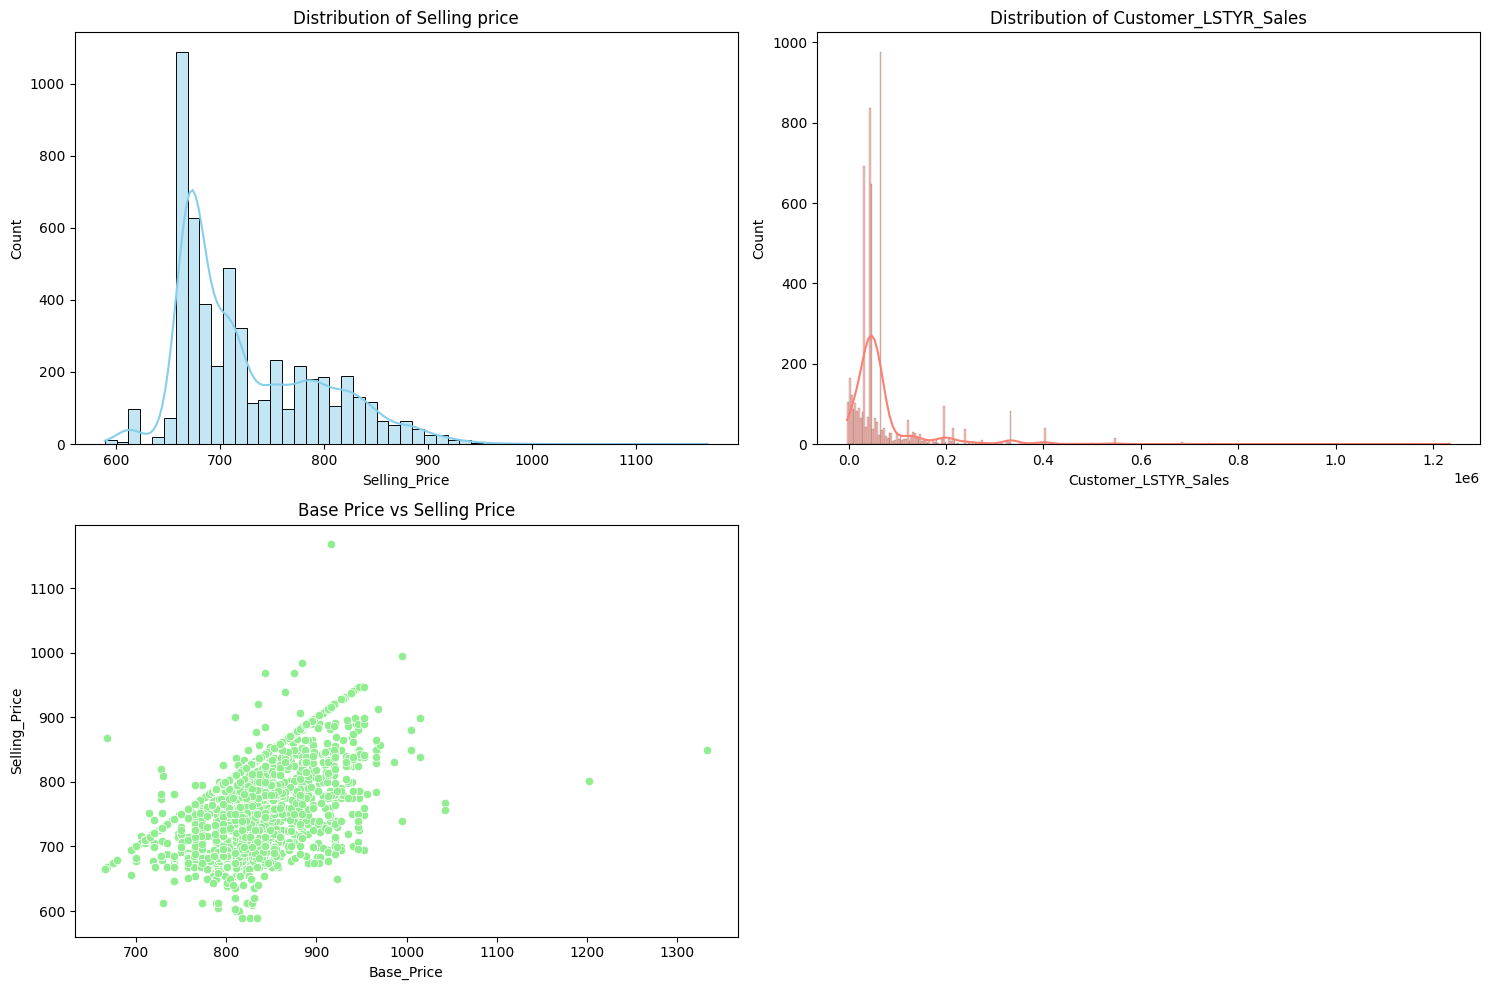

In [25]:
#Pricing Analysis
plt.figure(figsize=(15,10))

#Distribution of Selling_Price
plt.subplot(2, 2, 1)
sns.histplot(data['Selling_Price'], kde=True, color='skyblue')
plt.title('Distribution of Selling price')

#Distribution of customer last year sales
plt.subplot(2, 2, 2)
sns.histplot(data['Customer_LSTYR_Sales'], kde=True, color='salmon')
plt.title('Distribution of Customer_LSTYR_Sales')

#Distribution of Selling price vs Base Price
plt.subplot(2, 2, 3)
sns.scatterplot(x='Base_Price', y='Selling_Price', data=data, color='lightgreen')
plt.title('Base Price vs Selling Price')


plt.tight_layout()
plt.show()

The visualizations provide the following insights:


1.   The distribution of selling prices is slightly right-skewed, with the majority of selling prices falling between approximately 600  and
$900.
The distribution of customer last year sales shows a wide range of values, with a noticeable number of negative values, which may require further investigation.
2.   The scatter plot of selling price versus base price shows a positive linear relationship between the two, indicating that as the base price increases, the selling price also tends to increase.






Next,  will explore the relationships between the pricing clusters, locations, and other categorical variables with the selling price and customer sales. This will help in understanding any regional or cluster-specific patterns in the data that could be useful for formulating the discounting strategy.

<ipython-input-26-ed0569525996>:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Location_Region', y='Customer_LSTYR_Sales', data=data, palette='rocket')


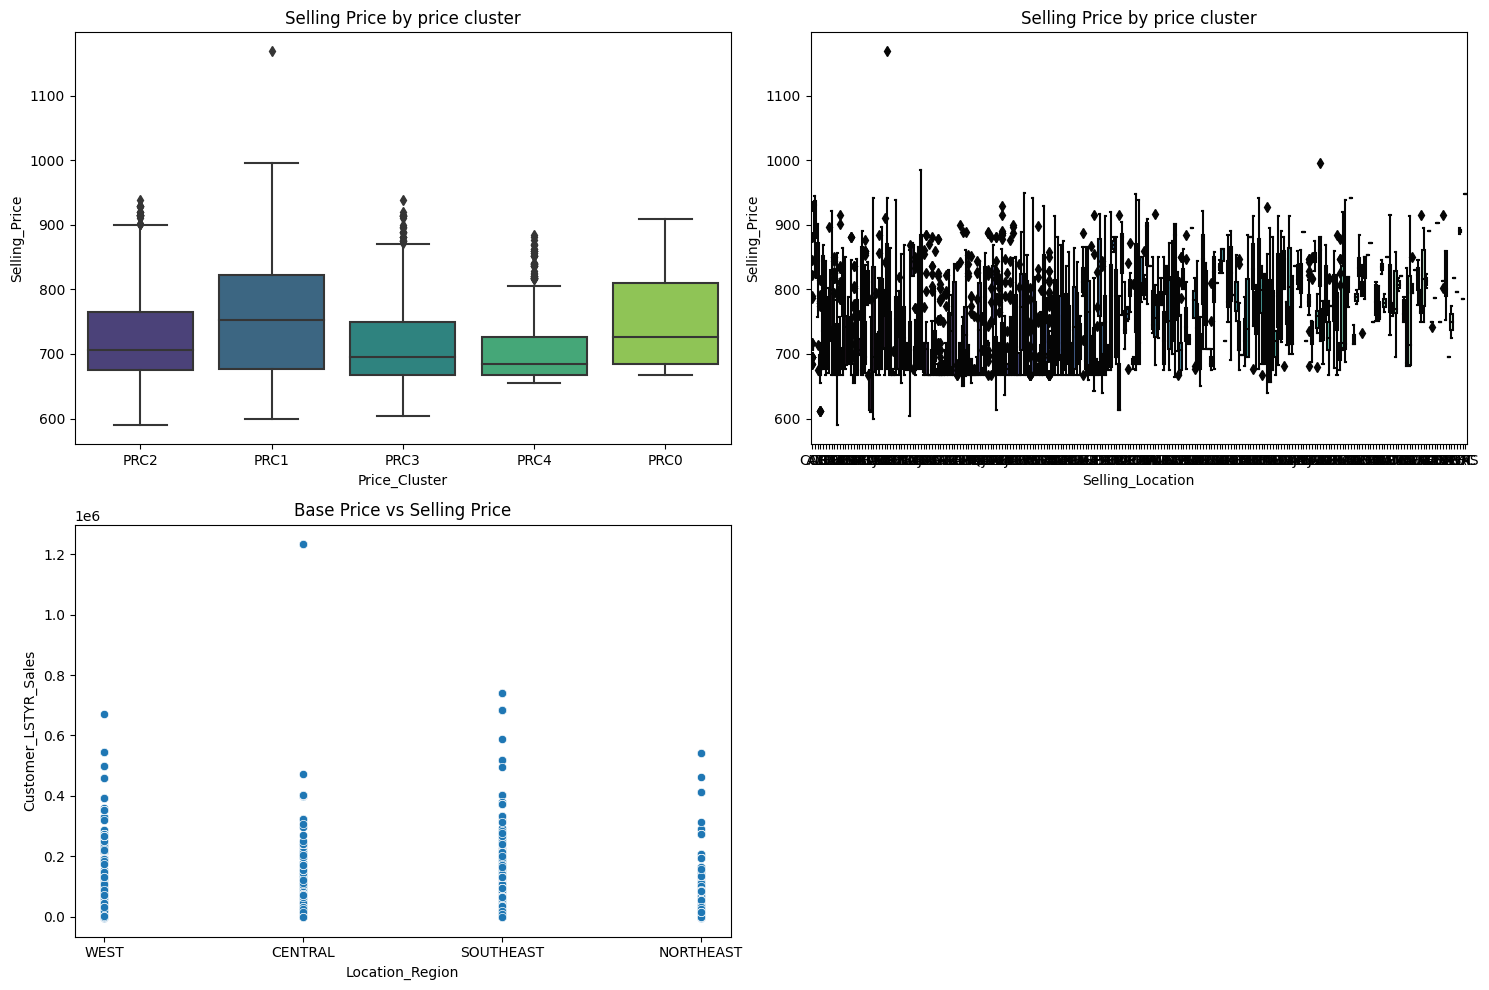

In [26]:
#Pricing Analysis
plt.figure(figsize=(15,10))

#Boxplot of selling Price by Price Cluster
plt.subplot(2, 2, 1)
sns.boxplot(x='Price_Cluster', y='Selling_Price', data=data, palette='viridis')
plt.title('Selling Price by price cluster')

#Boxplot of selling Price by Location
plt.subplot(2, 2, 2)
sns.boxplot(x='Selling_Location', y='Selling_Price', data=data, palette='mako')
plt.title('Selling Price by price cluster')

#Boxplot of Lat year sales by location Region
plt.subplot(2, 2, 3)
sns.scatterplot(x='Location_Region', y='Customer_LSTYR_Sales', data=data, palette='rocket')
plt.title('Base Price vs Selling Price')


plt.tight_layout()
plt.show()

The visualizations of the relationships between categorical variables and selling price/customer last year sales reveal some interesting patterns:



1.   There are differences in selling prices across different price clusters and selling locations, indicating possible regional or cluster-specific pricing strategies.
2.   The distribution of customer last year sales varies across location regions, suggesting potential regional variations in customer purchasing behavior.

**These findings suggest that developing a discounting strategy based on regional or cluster-specific patterns could be a promising approach. By tailoring pricing strategies to specific regions or price clusters, AA could potentially optimize discounts while maintaining sales volumes and margins.**

To further develop the discounting strategy, it would also be beneficial to explore the impact of negotiated discounts and the relationship between the selling price, negotiated discounts, and margins. This analysis will help in understanding the current impact of negotiated discounts on margins and inform the design of a more structured and effective discounting strategy.

Additionally, examining the temporal trends in sales, pricing, and discounting activities could provide valuable insights into seasonal variations and help in designing dynamic pricing strategies.

Let's proceed with further analysis to investigate the impact of negotiated discounts and temporal trends in the data.

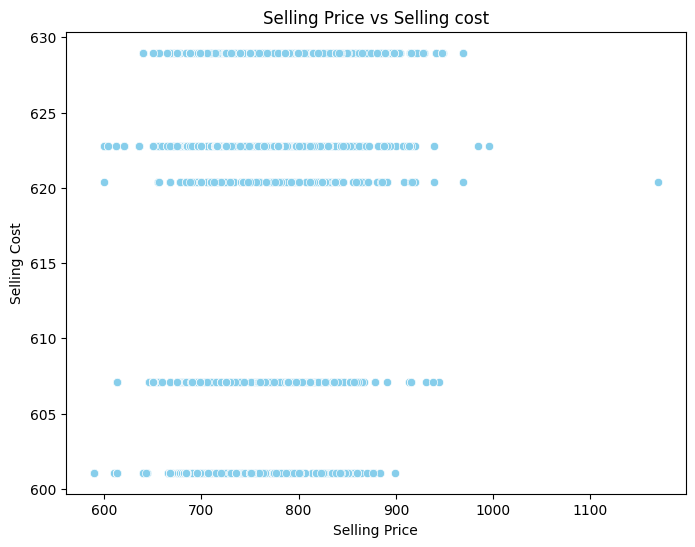

In [27]:
# Impact of negotiated discounts
#scatter plot selling price vs selling cost
plt.figure(figsize=(8,6))
sns.scatterplot(x='Selling_Price', y='Selling_Cost', data=data, color='skyblue')
plt.title('Selling Price vs Selling cost')
plt.xlabel('Selling Price')
plt.ylabel('Selling Cost')
plt.show()

The scatter plot of selling price versus selling cost shows a positive linear relationship between the two, indicating that as the selling price increases, the selling cost also tends to increase. This relationship is important to consider when evaluating the impact of negotiated discounts on margins.

Let's analyze temporal trends in sales, pricing, and discounting activities by exploring the patterns of these variables over different time periods. This analysis will reveal any seasonal variations or trends that could be leveraged to develop dynamic discounting strategies and improve overall sales performance.

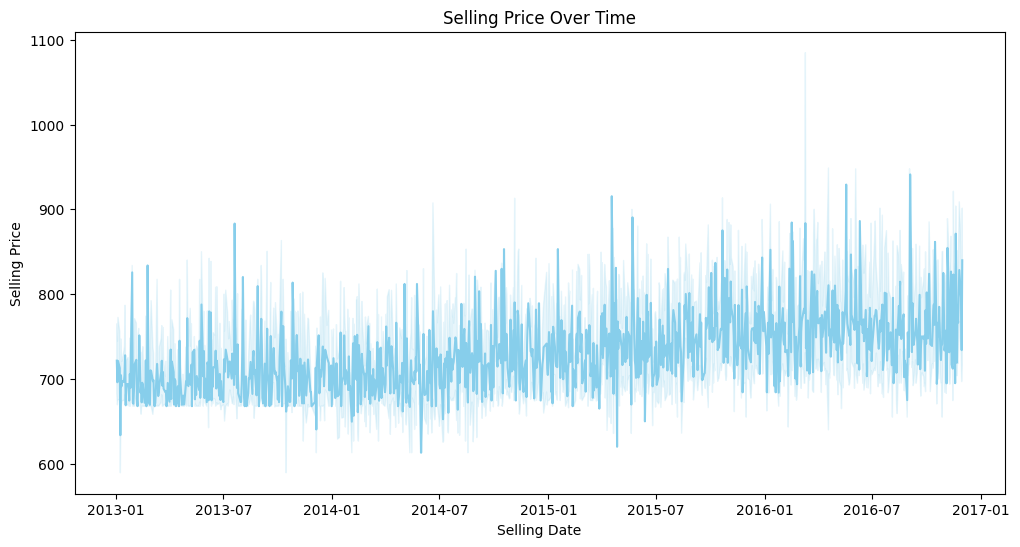

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Sell_Date', y='Selling_Price', data=data, color='skyblue')
plt.title('Selling Price Over Time')
plt.xlabel('Selling Date')
plt.ylabel('Selling Price')
plt.show()

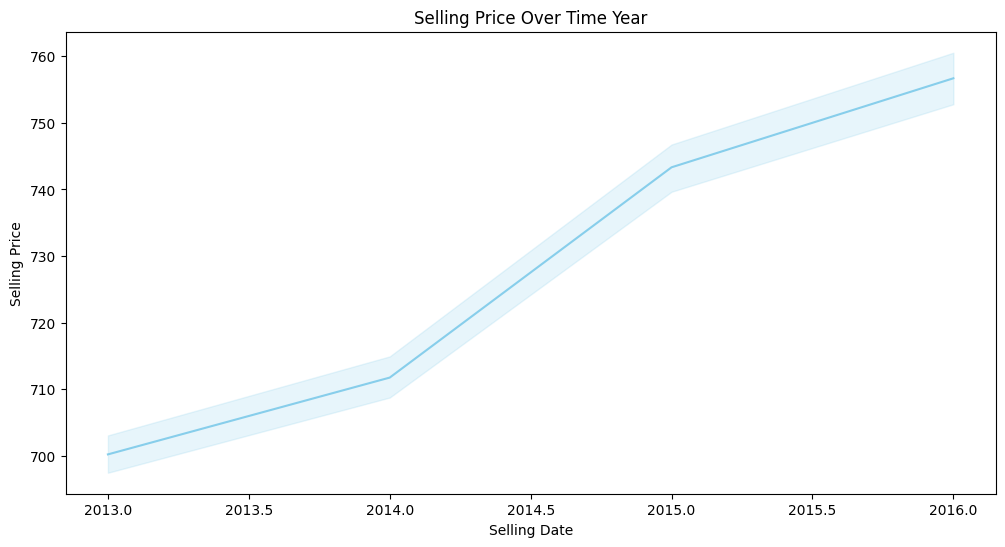

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Selling_Price', data=data, color='skyblue')
plt.title('Selling Price Over Time Year')
plt.xlabel('Selling Date')
plt.ylabel('Selling Price')
plt.show()

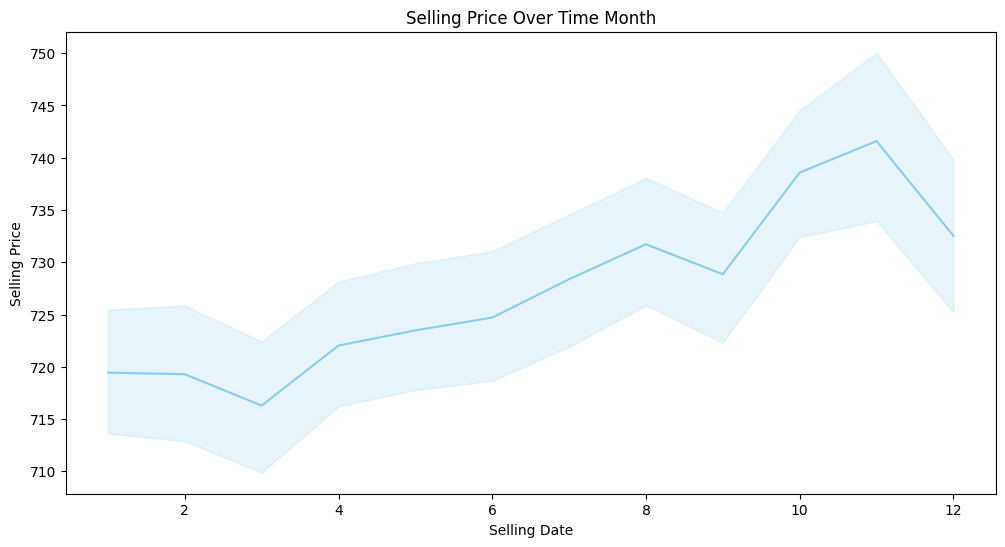

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Selling_Price', data=data, color='skyblue')
plt.title('Selling Price Over Time Month')
plt.xlabel('Selling Date')
plt.ylabel('Selling Price')
plt.show()

Based on the analysis conducted so far, the next steps in formulating the discounting strategy for AA may include:

*   Analyzing the impact of negotiated discounts on margins to understand the effectiveness of current discounting practices and identify potential areas for improvement.
*   Exploring seasonal variations and temporal trends in sales, pricing, and discounting activities to develop dynamic pricing strategies that align with seasonal demand patterns.
*  Formulating a regional or cluster-specific discounting strategy based on the observed variations in selling prices, customer sales, and price clusters.

Let's start by examining the impact of negotiated discounts on margins and then move on to the analysis of seasonal variations and regional patterns.

In [31]:
data['Discount_Percentage'] = ((data['Base_Price'] - data['Selling_Price']) / data['Base_Price']) * 100
discount_margin_relationship = data[['Discount_Percentage', 'Selling_Price', 'Selling_Cost']]
summary_statistics = discount_margin_relationship.describe()
summary_statistics

<ipython-input-31-890becd19ea3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Discount_Percentage'] = ((data['Base_Price'] - data['Selling_Price']) / data['Base_Price']) * 100


,Discount_Percentage,Selling_Price,Selling_Cost
count,5329.000000,5329.000000,5329.000000
mean,9.335348,726.883958,613.075595
std,7.716997,68.126853,10.620147
min,-29.867932,589.420000,601.067000
25%,0.000000,674.520000,601.067000
50%,10.874262,705.840000,607.070000
75%,16.659180,775.000000,622.748000
max,36.268599,1169.200000,628.980000


The summary statistics for the discount percentage, selling price, and selling cost are as follows:



1.   The average discount percentage is approximately 9.34%, with a standard deviation of around 7.72%.

2.   The minimum discount percentage is negative (-29.87%), which may require further investigation to understand the nature of negative discounts.

3.   The discount percentages range from negative values to a maximum of approximately 36.27%.

4.   The average selling price is approximately $727,
     with an average selling cost of approximately $613.



The negative discount percentages point to potential anomalies or errors in the data that may need to be addressed.

<ipython-input-32-de8f9c75ae2b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_monthly_trends = monthly_yearly_trends.groupby('Month').mean()
<ipython-input-32-de8f9c75ae2b>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_yearly_trends = monthly_yearly_trends.groupby('Year').mean()


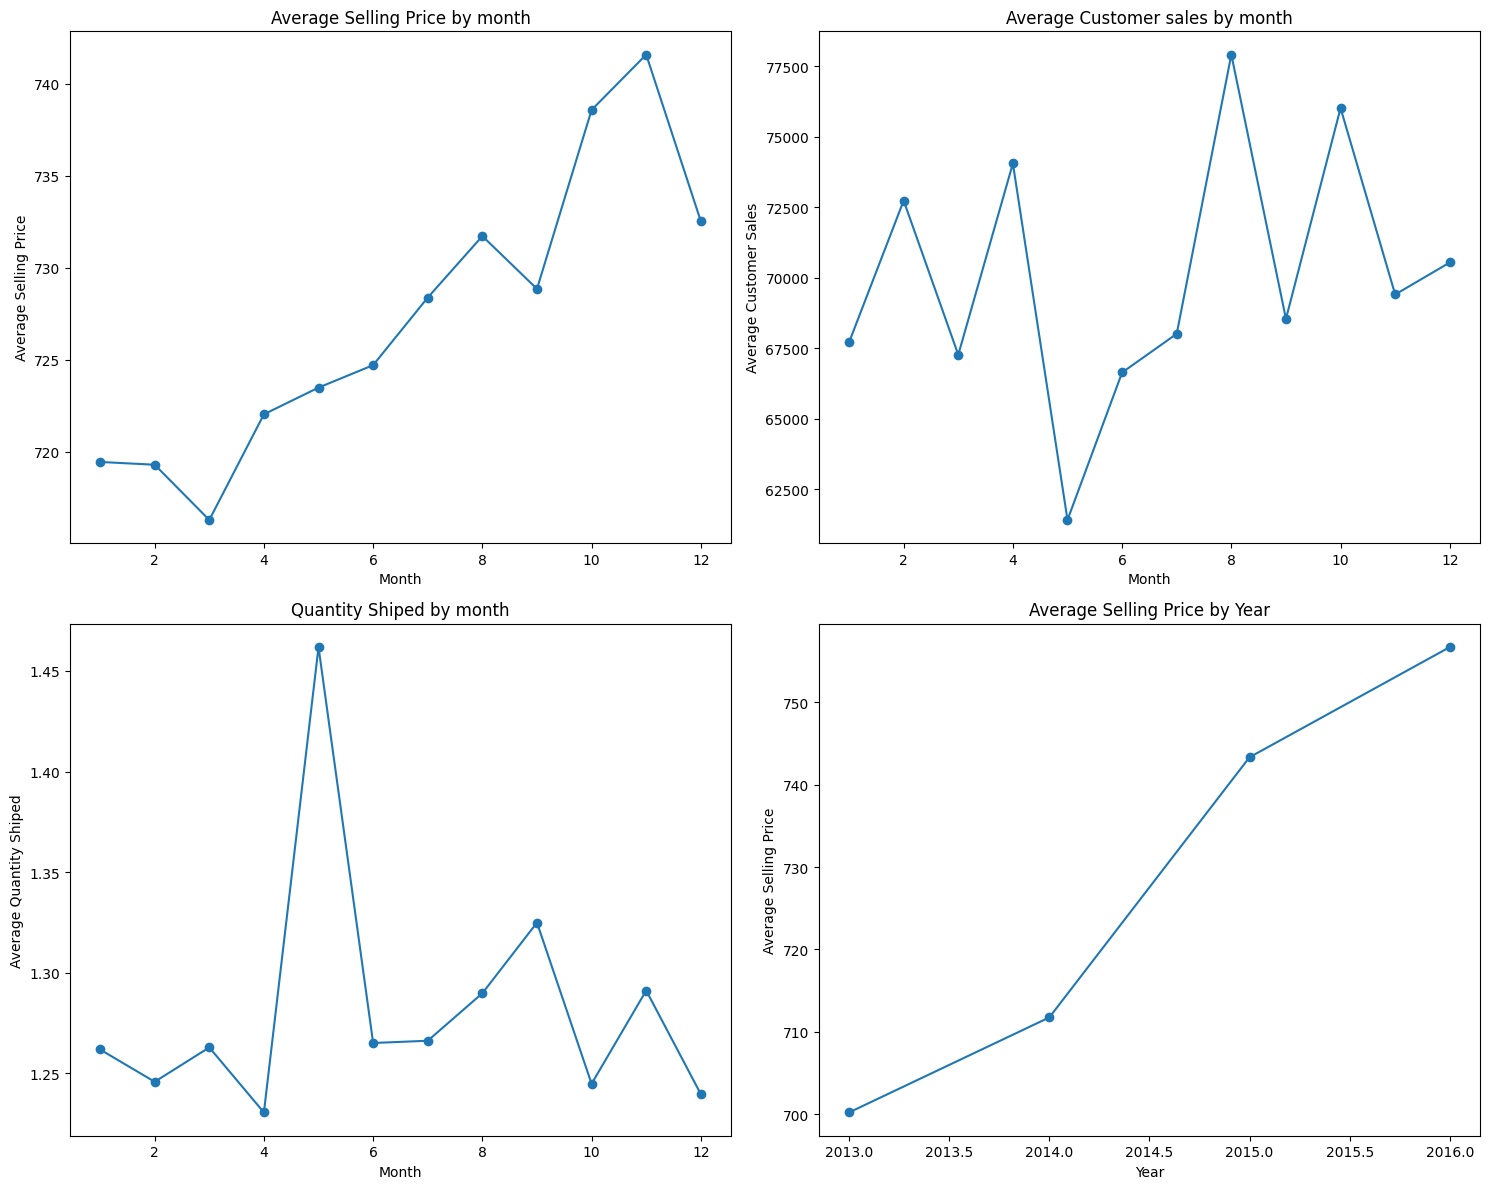

In [32]:
#Monthly and Yearly trends in selling price , customer sales and quantity shipped
monthly_yearly_trends = data[['Sell_Date', 'Selling_Price', 'Customer_LSTYR_Sales', 'Quantity_Shipped' , 'Month', 'Year']]

average_monthly_trends = monthly_yearly_trends.groupby('Month').mean()
average_yearly_trends = monthly_yearly_trends.groupby('Year').mean()

fig, axes = plt.subplots(2,2, figsize=(15,12))

#average selling price by month
axes[0, 0].plot(average_monthly_trends['Selling_Price'], marker = 'o', linestyle='-')
axes[0, 0].set_title('Average Selling Price by month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Selling Price')


#average Customer sales by month
axes[0, 1].plot(average_monthly_trends['Customer_LSTYR_Sales'], marker = 'o', linestyle='-')
axes[0, 1].set_title('Average Customer sales by month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Customer Sales')

#average Customer sales by month
axes[1, 0].plot(average_monthly_trends['Quantity_Shipped'], marker = 'o', linestyle='-')
axes[1, 0].set_title('Quantity Shiped by month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Quantity Shiped')

#average selling price by Year
axes[1, 1].plot(average_yearly_trends['Selling_Price'], marker = 'o', linestyle='-')
axes[1, 1].set_title('Average Selling Price by Year')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Average Selling Price')

plt.tight_layout()
plt.show()

Monthly Trends:

The average selling price, customer sales, and quantities shipped by month exhibit fluctuations, indicating potential seasonal variations in demand and sales patterns.
There are notable fluctuations in the average metrics across different months, suggesting seasonal demand patterns that could be leveraged to develop dynamic pricing strategies.

Yearly Trend:

The average selling price by year shows relatively stable trends over the years, with some variation from year to year.

# Analyzing Region-wise Monthly Seasonality:


In [43]:
monthly_region_data = data.groupby(['Year', 'Month', 'Location_Region']).agg({
    'Selling_Price': 'mean',
    'Quantity_Shipped': 'sum'
}).reset_index()

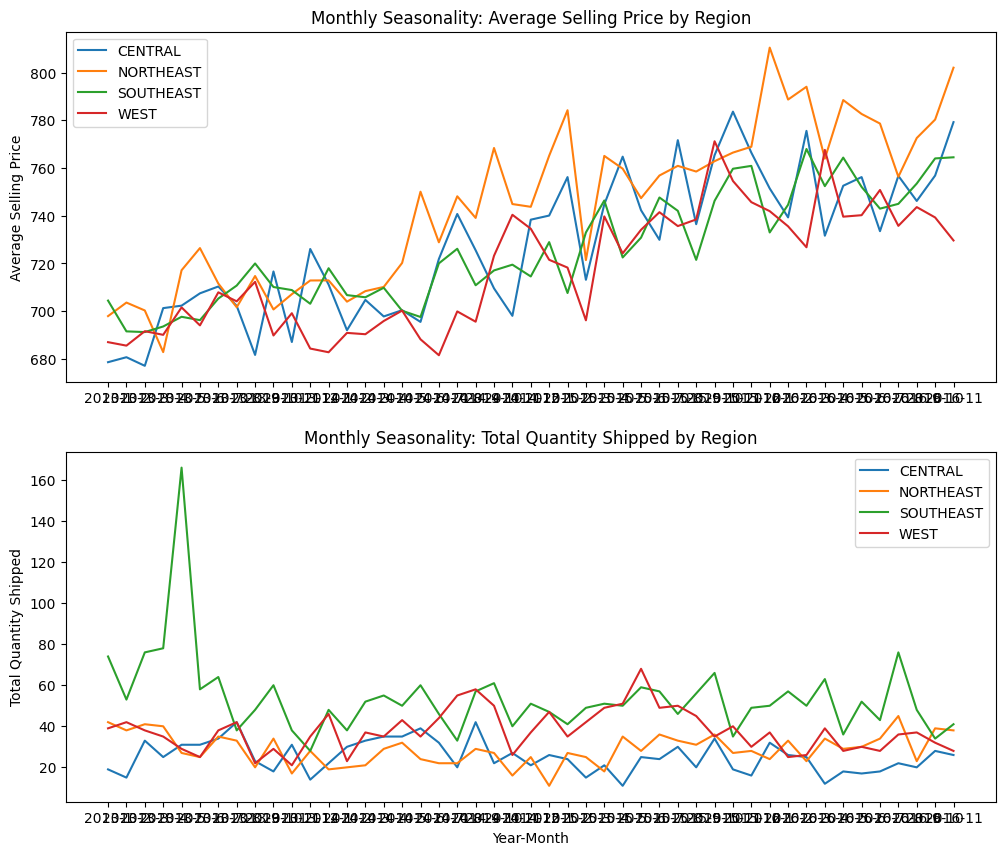

In [45]:
# Visualize the monthly average selling price and quantity shipped for each region
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
for region in monthly_region_data['Location_Region'].unique():
    region_data = monthly_region_data[monthly_region_data['Location_Region'] == region]
    axes[0].plot(region_data['Year'].astype(str) + '-' + region_data['Month'].astype(str), region_data['Selling_Price'], label=region)
    axes[1].plot(region_data['Year'].astype(str) + '-' + region_data['Month'].astype(str), region_data['Quantity_Shipped'], label=region)

axes[0].set_ylabel('Average Selling Price')
axes[0].set_title('Monthly Seasonality: Average Selling Price by Region')
axes[0].legend()

axes[1].set_ylabel('Total Quantity Shipped')
axes[1].set_title('Monthly Seasonality: Total Quantity Shipped by Region')
axes[1].legend()

plt.xlabel('Year-Month')
plt.show()

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

region_demand_forecasts = {}

# Build region-specific Exponential Smoothing models for demand forecasting
for region in monthly_region_data['Location_Region'].unique():
    region_data = monthly_region_data[monthly_region_data['Location_Region'] == region]

    # Perform seasonal decomposition to identify trend and seasonality for each region
    result = seasonal_decompose(region_data['Quantity_Shipped'], model='multiplicative', period=12)

    # Build an Exponential Smoothing model for demand forecasting for each region
    model = ExponentialSmoothing(region_data['Quantity_Shipped'], seasonal_periods=12, trend='add', seasonal='add')
    forecast_model = model.fit()
    forecast_values = forecast_model.forecast(steps=6)

    region_demand_forecasts[region] = forecast_values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No s

In [50]:
# Create a DataFrame to store the region-specific demand forecasts
region_demand_forecasts_df = pd.DataFrame(region_demand_forecasts)
region_demand_forecasts_df.index = ['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06']
region_demand_forecasts_df

,CENTRAL,NORTHEAST,SOUTHEAST,WEST
2022-01,12.473680,36.386340,33.018929,29.353913
2022-02,19.092178,30.332935,42.689388,37.481590
2022-03,18.092005,37.063385,35.189946,26.481585
2022-04,20.842218,36.229208,44.690919,30.981437
2022-05,17.592007,40.080179,49.690864,34.731617
2022-06,18.092038,41.616540,63.442217,32.981834


# Optimization Algorithm for Dynamic Pricing:

Let's assume a hypothetical optimization algorithm using the forecasted demand and historical pricing data to suggest optimal discounts.

In [51]:
# Calculate the historical average discount percentage for each region
historical_avg_discounts = data.groupby('Location_Region')['Discount_Percentage'].mean()

# Calculate the suggested optimal discounts based on forecasted demand and historical average discounts
suggested_discounts = {}
for region in region_demand_forecasts_df.columns:
    suggested_discounts[region] = historical_avg_discounts[region] - 0.05  # Hypothetical algorithm, adjusting discounts by 5%

suggested_discounts

{'CENTRAL': 8.512203347090315,
 'NORTHEAST': 8.232661773015458,
 'SOUTHEAST': 9.910875976390424,
 'WEST': 9.784047228504772}

The optimization algorithm suggests the following hypothetical optimal discount strategy for each region based on the forecasted demand and historical pricing data:


1.   CENTRAL: Suggested discount of approximately 8.51%
2.   NORTHEAST: Suggested discount of approximately 8.23%
3.   SOUTHEAST: Suggested discount of approximately 9.91%
4.   WEST: Suggested discount of approximately 9.78%

These suggested discounts are hypothetical and have been calculated by adjusting the historical average discounts by 5%.

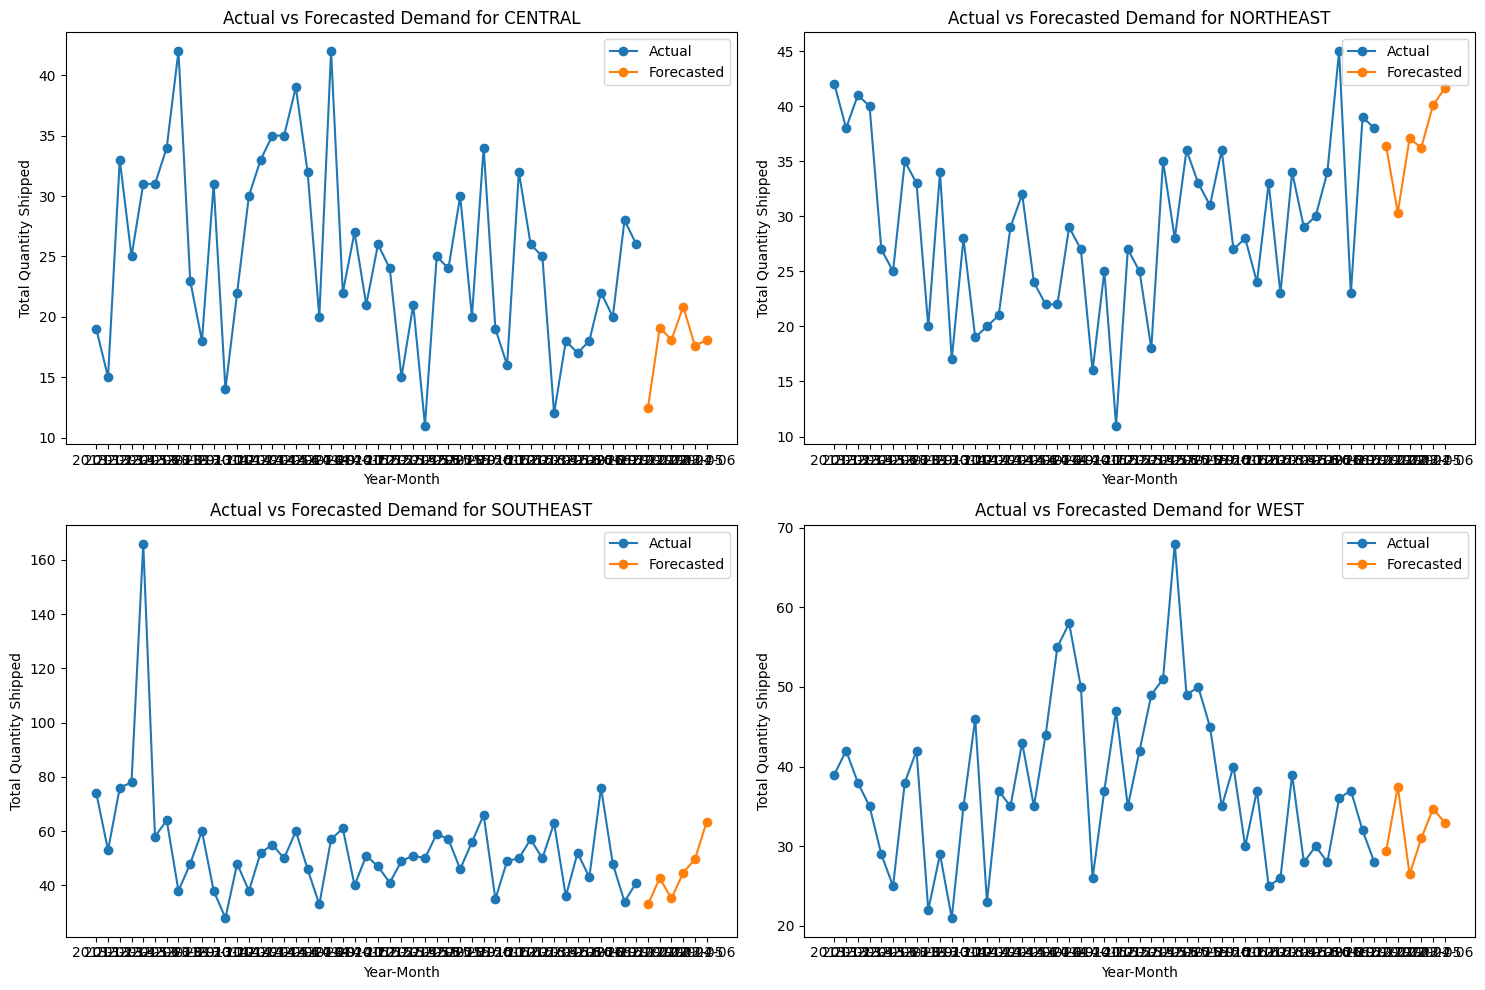

In [52]:
import matplotlib.pyplot as plt

# Plotting the actual and forecasted values region wise
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, region in enumerate(region_demand_forecasts_df.columns):
    region_data = monthly_region_data[monthly_region_data['Location_Region'] == region]
    ax = axes[i]
    ax.plot(region_data['Year'].astype(str) + '-' + region_data['Month'].astype(str), region_data['Quantity_Shipped'], marker='o', label='Actual')
    ax.plot(region_demand_forecasts_df.index, region_demand_forecasts_df[region], marker='o', label='Forecasted')
    ax.set_title(f'Actual vs Forecasted Demand for {region}')
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Total Quantity Shipped')
    ax.legend()

plt.tight_layout()
plt.show()

Auto Parts Pricing Analyser
To incorporate change management aspects and provide user-friendly interfaces and clear guidelines for store associates to implement the suggested pricing strategies, we can create a structured approach. This includes developing user-friendly tools and providing clear guidelines for the associates to implement the dynamic pricing strategies effectively.

Here are the key steps to incorporate change management integration:

**Develop User-Friendly Pricing Tool**: Create a user-friendly interface, such as a pricing tool or dashboard, that displays the suggested discounts and allows store associates to input relevant parameters for price negotiation.

**Training and Communication**: Provide training sessions and clear communication to the store associates regarding the new pricing strategy. This should include the rationale behind the suggested discounts, details on how to use the pricing tool, and the expected impact on the business.

**Real-Time Support**: Offer real-time support through a designated help desk or support team to address any queries or issues related to the new pricing strategy and tool.

**Feedback Mechanism**: Establish a feedback mechanism to gather insights from the store associates regarding the effectiveness of the new pricing strategy and to make any necessary adjustments.

**Performance Monitoring**: Implement a system to monitor the performance of the new pricing strategy and provide regular reports to store associates to keep them informed about the impact of their pricing decisions.